*To be run on Sage kernel, with eel installed*

In [1]:
import eel
from IPython.display import IFrame

In [2]:
import eel
from IPython.display import IFrame

class App:
    def __init__(self, graph=None, exposed_fns=set()):
        """Initialize Eel, set web files directory, and expose new functions"""
        eel.init('src')

        # state variables
        self.server_on = False
        self.iframe = None
        self.graph = graph
        
        # expose functions
        self.eel_fns = self._get_eel_fns()
        for name, fn in self.eel_fns.items():
            if name not in exposed_fns:
                eel.expose(fn)
                exposed_fns.add(name)

    def _get_eel_fns(self):
        """Return dict of functions to be exposed to JS"""

        def update_server_status(state):
            self.server_on = state

            # return results if state == False
            if (state == False):
                print("Editor Closed.")

        def print_from_js(data):
            print(data)

        def save_graph(g):
            self.graph = g
            print(g)

        def get_graph():
            return self.graph

        # return dict of functions
        return {
            'update_server_status': update_server_status,
            'print_from_js': print_from_js,
            'save_graph': save_graph,
            'get_graph': get_graph,
        }

    def lifetime_thread(self):
        """Run Eel thread for lifetime of app, checking for server status"""
        # attempt to display app until get feedback from JS
        while self.server_on == False:
            # self.iframe = IFrame(src="http://localhost:8000/draw.html",width=900,height=900)
            # display(self.iframe)

            eel.sleep(0.5)
        
        # watch for server to end
        while self.server_on == True:
            eel.sleep(0.5)

    def start(self):
        """Instantiate Eel server and lifetime thread"""
        # start server
        eel.start('draw.html', mode=None, block=False)

        # run lifetime thread
        self.lifetime_thread()

    # function to return graph in Sage
    def conv_to_sage(self):
        """Return graph in Sage"""
        # build dict from internal graph
        g_dict = {}
        for v in self.graph['vertices']:
            g_dict[v['id']] = []
        for e in self.graph['edges']:
            g_dict[e['sourceId']].append(e['targetId'])

        return Graph(g_dict)



In [3]:
# retreive example data for constructor
from examples import get_example
g = get_example()
exposed_fns = set()

In [4]:
app = App(graph=g, 
          exposed_fns=exposed_fns)

In [5]:
app.start()

Traceback (most recent call last):
  File "src/cysignals/signals.pyx", line 310, in cysignals.signals.python_check_interrupt
KeyboardInterrupt
2023-06-12T18:42:18Z


KeyboardInterrupt: 

In [6]:
app.graph

{'edges': [{'weight': 2, 'sourceId': 22, 'targetId': 21},
  {'weight': 1, 'sourceId': 21, 'targetId': 4},
  {'weight': 1, 'sourceId': 21, 'targetId': 5},
  {'weight': 1, 'sourceId': 22, 'targetId': 20},
  {'weight': 1, 'sourceId': 20, 'targetId': 19},
  {'weight': 1, 'sourceId': 20, 'targetId': 18},
  {'weight': 1, 'sourceId': 17, 'targetId': 23},
  {'weight': 1, 'sourceId': 23, 'targetId': 16},
  {'weight': 1, 'sourceId': 24, 'targetId': 20},
  {'weight': 1, 'sourceId': 25, 'targetId': 22},
  {'weight': 1, 'sourceId': 25, 'targetId': 24},
  {'weight': 2, 'sourceId': 23, 'targetId': 24},
  {'weight': 1, 'sourceId': 25, 'targetId': 6},
  {'weight': 1, 'sourceId': 30, 'targetId': 26},
  {'weight': 1, 'sourceId': 30, 'targetId': 15},
  {'weight': 1, 'sourceId': 27, 'targetId': 31},
  {'weight': 1, 'sourceId': 28, 'targetId': 29},
  {'weight': 2, 'sourceId': 26, 'targetId': 29},
  {'weight': 2, 'sourceId': 28, 'targetId': 31},
  {'weight': 2, 'sourceId': 27, 'targetId': 30},
  {'weight': 1

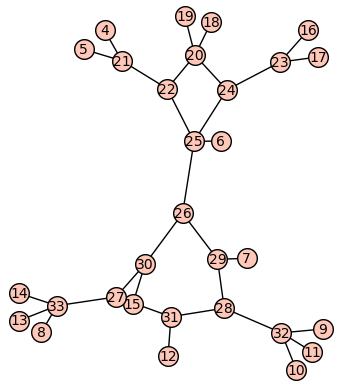

In [7]:
g = app.conv_to_sage()
g.show()